<a href="https://colab.research.google.com/github/pck196/Python_Assignment/blob/master/Python_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing pandas, numpy and seaborn
!pip3 install pandas --upgrade
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.0.3)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Checking panda version
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.18.3
1.0.3
0.10.1


In [3]:
#Importing data file
df=pd.read_csv("https://raw.githubusercontent.com/pck196/Python_Assignment/master/Tips_Quick_EDA_exercise.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


In [4]:
#Finding empty values in table
empty_columns=df.columns[df.isna().any()]
df[empty_columns].isna().sum()

total_bill    1
tip           1
day           1
time          1
size          1
dtype: int64

In [5]:
#Deleting unwanted rows
df1=df.dropna()
df1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0


In [6]:
#Finding empty values in table
empty_columns1=df1.columns[df1.isna().any()]
df1[empty_columns1].isna().sum()

Series([], dtype: float64)

As no empty cell was found in the table, Now we can proceed with working on data to solve problems.

Question 1:- What is the overall average tip?

In [7]:
print('The overall average tip is',str(round(df1.tip.mean(),2))+'.')

The overall average tip is 3.0.


Question 2:- Get a numerical summary for 'tip'.
             Are the median and mean very different?
             What does this tell you about the field?

In [8]:
print('1.Numerical summary for tip is:-')
print(df1.tip.describe())
print("2.For the column 'tip' Median is",round(df1.tip.median(),3),'and','Mean is',round(df1.tip.mean(),3),"we can see that Mean and Meadian are not so different.\n3.This tels us that probably there are no outliers in the field 'tip'.")

1.Numerical summary for tip is:-
count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64
2.For the column 'tip' Median is 2.9 and Mean is 2.998 we can see that Mean and Meadian are not so different.
3.This tels us that probably there are no outliers in the field 'tip'.


Question 3:- Prepare a boxplot for 'tip', Are there any outliers?

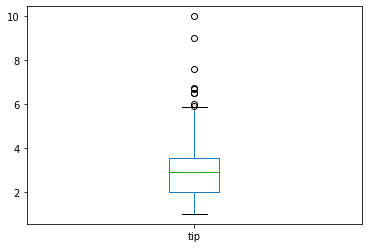

From this boxplot we can clearly see that their are Outliers in the field 'tip'.


In [10]:
%matplotlib inline
df1.tip.plot.box()
plt.show()
print("From this boxplot we can clearly see that their are Outliers in the field 'tip'.")

Question 4:- Prepare a boxplot for 'total_bill', are there any outliers?

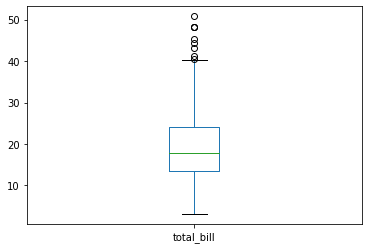

From this boxplot we can clearly see that their are Outliers in the field 'total_bill'.


In [11]:
df1.total_bill.plot.box()
plt.show()
print("From this boxplot we can clearly see that their are Outliers in the field 'total_bill'.")

Question 5:- Gender: what is the percent of females in the data?

In [12]:
prct=df1.sex.value_counts(normalize=True)
print(prct,'\nThe percentage of females in the data are 35.68%.')

Male      0.643443
Female    0.356557
Name: sex, dtype: float64 
The percentage of females in the data are 35.68%.


Question 6:- Prepare a bar plot with the bars representing the percentage of records for each gender.

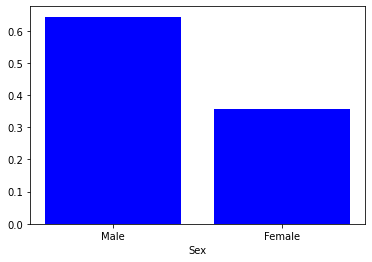

In [13]:
plt.bar(prct.index, prct.values, color="blue")
plt.xlabel('Sex')
plt.show()

Question 7:- Does the average tip differ by gender? Does one gender tip more than the other?

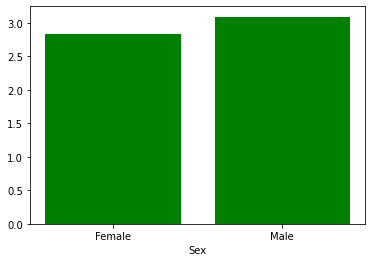

Yes, The average tip differs by gender.
We can see from the barchart, Male tip more than Female.


In [14]:
gbs=df1.groupby(['sex'])['tip'].mean()
plt.bar(gbs.index,gbs.values,color="green")
plt.xlabel('Sex')
plt.show()
print('Yes, The average tip differs by gender.\nWe can see from the barchart, Male tip more than Female.')

Question 8:- Does the average tip differ by the time of day?

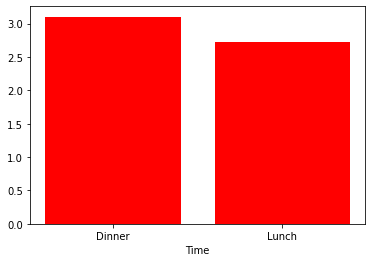

Yes, The average tip differs by time of the day.
We can see from the barchart that people tip more at Dinner than at Lunch.


In [15]:
gbt=df1.groupby(['time'])['tip'].mean()
plt.bar(gbt.index,gbt.values,color="red")
plt.xlabel('Time')
plt.show()
print('Yes, The average tip differs by time of the day.\nWe can see from the barchart that people tip more at Dinner than at Lunch.')

Question 9:- Does the average tip differ by size (number of people at the table)?

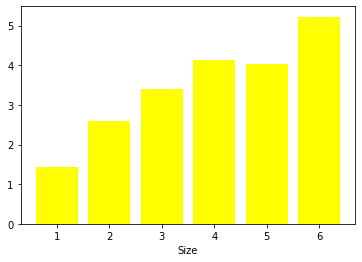

Yes, The average tip differs by number of people at table.
We can see from the barchart that tip increase as people at table increase.


In [16]:
gbsi=df1.groupby(['size'])['tip'].mean()
plt.bar(gbsi.index,gbsi.values,color="yellow")
plt.xlabel('Size')
plt.show()
print('Yes, The average tip differs by number of people at table.\nWe can see from the barchart that tip increase as people at table increase.')

Question 10:- Do smokers tip more than non-smokers?

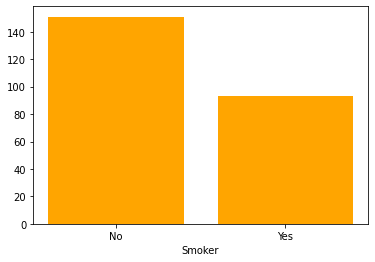

No, The Smokers tip less than Non-Smokers as seen in the barchart.


In [17]:
gbsm=df1.groupby(['smoker'])['tip'].count()
plt.bar(gbsm.index,gbsm.values,color="orange")
plt.xlabel('Smoker')
plt.show()
print('No, The Smokers tip less than Non-Smokers as seen in the barchart.')

Question 11:- Gender vs. smoker/non-smoker and tip size - create a 2 by 2 and get the average tip size. Which group tips the most?

smoker     No    Yes
sex                 
Female  2.774  2.932
Male    3.113  3.051


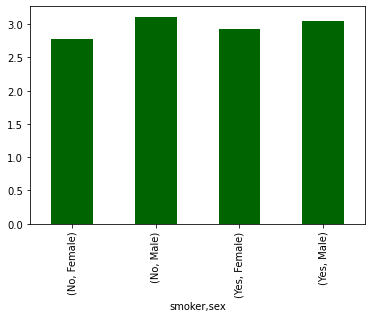

The Non-Smoker Male group tips the most.


In [18]:
print(round(df1.groupby(['sex','smoker'])['tip'].mean().unstack(),3))
df1.groupby(['smoker','sex'])['tip'].mean().plot.bar(color="darkgreen")
plt.show()
print('The Non-Smoker Male group tips the most.')

Question 12:- Create a new metric called 'pct_tip' = tip/ total_bill - this would be percent tip given, and should be a better measure of the tipping behaviour.

In [19]:
df1.insert(2,"pct_tip",df1.tip/df1.total_bill)
df1.head()

,total_bill,tip,pct_tip,sex,smoker,day,time,size
0,16.99,1.01,0.059447,Female,No,Sun,Dinner,2.0
1,10.34,1.66,0.160542,Male,No,Sun,Dinner,3.0
2,21.01,3.50,0.166587,Male,No,Sun,Dinner,3.0
3,23.68,3.31,0.139780,Male,No,Sun,Dinner,2.0
4,24.59,3.61,0.146808,Female,No,Sun,Dinner,4.0


Question 13:- Does pct_tip differ by gender? Does one gender tip more than the other?

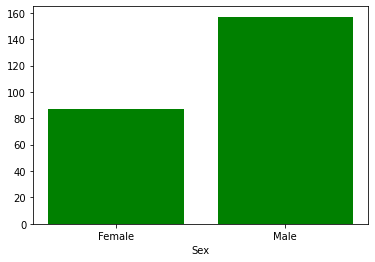

Yes, The pct_tip differs by gender.
We can see from the barchart, Male tip more than Female.


In [20]:
gbs=df1.groupby(['sex'])['pct_tip'].count()
plt.bar(gbs.index,gbs.values,color="green")
plt.xlabel('Sex')
plt.show()
print('Yes, The pct_tip differs by gender.\nWe can see from the barchart, Male tip more than Female.')

Question 14:- Does pct_tip differ by size (number of people at the table)?

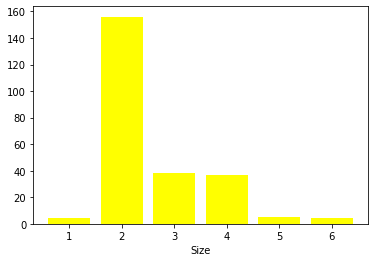

Yes, The pct_tip differs by number of people at table.
We can see from the barchart that pct_tip is highest when their are 2 people at the table.


In [21]:
gbsi=df1.groupby(['size'])['pct_tip'].count()
plt.bar(gbsi.index,gbsi.values,color="yellow")
plt.xlabel('Size')
plt.show()
print('Yes, The pct_tip differs by number of people at table.\nWe can see from the barchart that pct_tip is highest when their are 2 people at the table.')

Question 15:- Make the gender vs. smoker view using pct_tip  - does your inference change?

smoker     No    Yes
sex                 
Female  0.157  0.182
Male    0.161  0.153


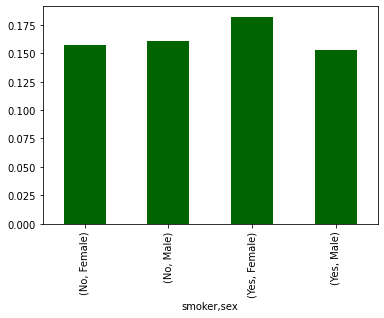

Yes, The inferance is changed.
As seen in the barchart the Smoker Female group gives more average pct_tip.


In [22]:
print(round(df1.groupby(['sex','smoker'])['pct_tip'].mean().unstack(),3))
df1.groupby(['smoker','sex'])['pct_tip'].mean().plot.bar(color="darkgreen")
plt.show()
print('Yes, The inferance is changed.\nAs seen in the barchart the Smoker Female group gives more average pct_tip.')

Question 16:- Make a scatter plot of total_bill vs. tip.

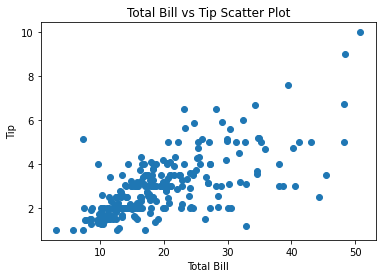

In [23]:
plt.scatter(x='total_bill', y='tip', data = df1)
plt.title('Total Bill vs Tip Scatter Plot')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

Question 17:- Make a scatter plot of total_bill vs. pct_tip.

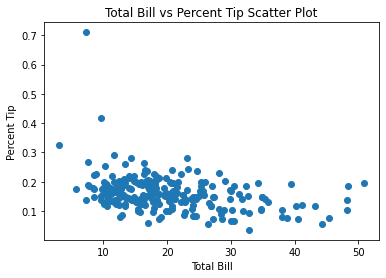

In [24]:
plt.scatter(x='total_bill', y='pct_tip', data = df1)
plt.title('Total Bill vs Percent Tip Scatter Plot')
plt.xlabel('Total Bill')
plt.ylabel('Percent Tip')
plt.show()